# US Accidents Exploratory Analysis
#### - This dataset is from Kaggle and conatins 7.3 million accident records on car accidents from 49 states in the U.S
#### - Data was collected from February 2016 to March 2023 using mulitple real time traffic APIs
#### - It conatins information such as the length of the accident, weather conditions, severity, location and much more
#### - This analysis can be useful to determine what factors effect the rate of accidents in the United States



In [2]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [4]:
data_filename = './us-accidents/US_Accidents_March23.csv'

# Data Preperation and Cleaning 

#### 1. Use Pandas to load file
#### 2. Fix incorrect or missing values

In [9]:
import pandas as pd

In [116]:
df = pd.read_csv(data_filename)

In [11]:
display(df)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [15]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


### Percentage of missing values per column

In [18]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

<AxesSubplot:>

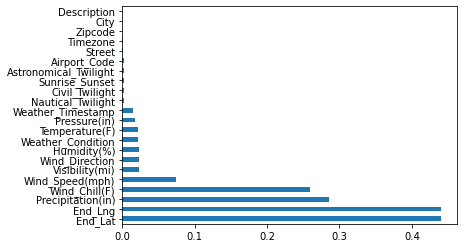

In [21]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Insights:
#### - Only a few of the columns in the dataset, such as End_Lat, End_Lng, Precipitation, Wind_Chill, and Wind_Speed are missing values in more than 20% of the rows

# Exploratory Analysis and Visualization

## Columns that will be analyzed:
#### 1. City
#### 2. Start time
#### 3. Start Lat, Start Lng



## City

In [117]:
cities = df.City.unique()
len(cities)

13679

In [33]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

<AxesSubplot:>

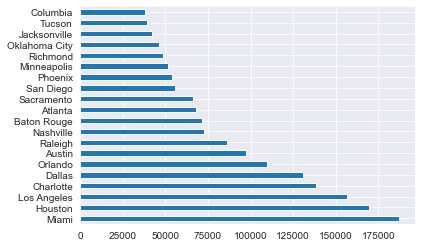

In [34]:
cities_by_accident[:20].plot(kind='barh')

In [29]:
import seaborn as sns
sns.set_style("darkgrid")

<AxesSubplot:xlabel='City', ylabel='Count'>

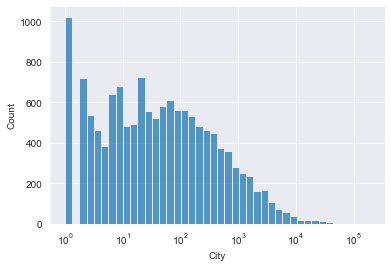

In [50]:
sns.histplot(cities_by_accident, log_scale = True) 

In [36]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [45]:
len(high_accident_cities)/ len(cities)

0.08904159660793917

/Users/sagardhaduk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

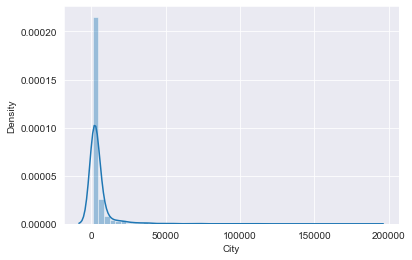

In [47]:
sns.distplot(high_accident_cities)

In [46]:
len(low_accident_cities) / len(cities)

0.910885298632941

/Users/sagardhaduk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

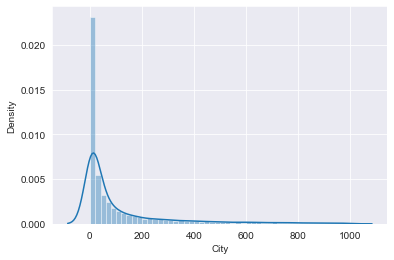

In [48]:
sns.distplot(low_accident_cities)

## Insights:
#### - There are 13679 unique cities where accidents have taken place
#### - The top 20 cities where the most amount of accidents have taken place are also some of the most populated cities in the United States
#### - Only around 9% of the unique cities that accidents have taken place have a count of more than a 1000 accidents a year, 91% of cities have less than 1000 accidents a year




## Start Time

In [51]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [54]:
df.Start_Time = pd.to_datetime(df.Start_Time)

/Users/sagardhaduk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

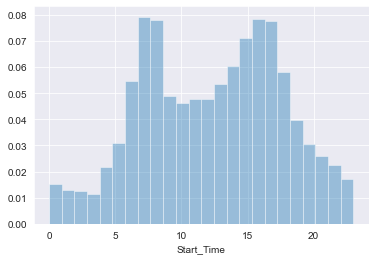

In [57]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

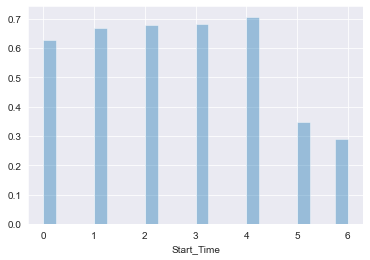

In [58]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

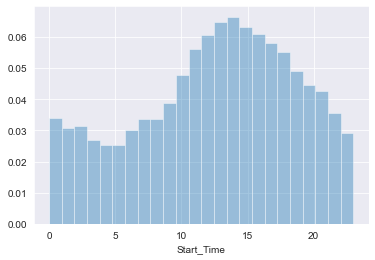

In [64]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

## Insights:
#### - Most accidents happen around 6/7 am or 4/5 pm on weekdays
#### - More accidents happen on weekdays compared to weekends
#### - On the weekend, the most accidents happen from 4/5 pm

## Questions and Answers:
### Why do accidents happen at a higher rate at 6/7 am or 4/5 pm on weekdays?
#### The majority of the population is driving to work at around 6/7 am on weekdays which means that the amount of cars on the road is at its peak around this time, and the same goes for 4/5 pm but in this case people are driving home from work.
### Why do more accidents happen on weekdays compared to weekends?
#### People are driving to and from work on weekdays, and on weekends people only have miscellaneous reasons to drive.


## Start Latitude and Longitude

In [63]:
df.Start_Lat 

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [66]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [73]:
pip install folium

     |████████████████████████████████| 102 kB 2.0 MB/s ta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [80]:
import folium
from folium.plugins import HeatMap

In [89]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lng_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [91]:
map = folium.Map( )
HeatMap(lat_lng_pairs).add_to(map)
map

## Insights:
#### - Most accidents take place within deeper parts of cities compared to city outskirts
#### - The Midwest has considerably less accidents than other regions of the U.S 

## Questions and Answers:
### Why do more accidents take place in deeper parts of cities compared to city outskirts? 
#### The most likely reason this statistic exists is because the population density is higher in the city which increases the amount of cars on the road, and driving in the city is more complicated/confusing compared to driving in suburbs or rural roads.

### Why are there less accidents in the Midwest region of the United States?
#### The population density in the Midwest is a much smaller number compared to other regions in the U.S


# Summary and Conclusion


## In summary, the vast majority of accidents occur in only a few of the populous cities. These accidents that do occur, occur mostly at 6/7 am or 4/5 pm where the traffic on roads are at their peak. In terms of the United States as a whole, the Midwest regions sees the least amount of accidents occuring compared to the rest of the United States.



